In [2]:
import music21 as m21
from pathlib import Path
import lib.score_visualization as sv
import lib.m21utils as m21u
import lib.NotationLinear as nlin
import lib.score_comparison_lib as scl

music21: Certain music21 functions might need the optional package matplotlib;
                  if you run into errors, install it by following the instructions at
                  http://mit.edu/music21/doc/installing/installAdditional.html


## Obtain the list of differences

In [3]:
#load score1 in music21
score1_path = Path("tests/test_scores/polyphonic_score_1a.mei")
with open(score1_path, 'r') as f:
    mei_string = f.read()
    conv = m21.mei.MeiToM21Converter(mei_string)
    score1 = conv.run()

#load score2 in music21
score2_path = Path("tests/test_scores/polyphonic_score_1b.mei")
with open(score2_path, 'r') as f:
    mei_string = f.read()
    conv = m21.mei.MeiToM21Converter(mei_string)
    score2 = conv.run()

#build the linear representation of the score
score_lin1 = nlin.Score(score1)
score_lin2 = nlin.Score(score2)

#compute the complete score diff
op_list, cost=scl.complete_scorelin_diff(score_lin1,score_lin2)
#generate the list of annotations in json format
operation_json = scl.op_list2json(op_list)
operation_json

[{'operation': 'deltuplet',
  'reference_score1': [('G4', 'None', False)],4,0,[],['stop'],d1e375,[],[],
  'reference_score2': [('G4', 'None', False)],4,0,[],[],d1e388,[],[],
  'info': None},
 {'operation': 'delnote',
  'reference_score1': [('B4', 'None', False)],4,0,[],['continue'],d1e356,[],[],
  'reference_score2': None,
  'info': None},
 {'operation': 'deltuplet',
  'reference_score1': [('A4', 'None', False)],4,0,[],['start'],d1e335,[],[],
  'reference_score2': [('A4', 'None', False)],4,0,[],[],d1e374,[],[],
  'info': None},
 {'operation': 'subbeam',
  'reference_score1': [('B4', 'None', False)],4,0,['partial'],[],d1e321,[],[],
  'reference_score2': [('B4', 'None', False)],4,0,['stop'],[],d1e358,[],[],
  'info': None},
 {'operation': 'instie',
  'reference_score1': [('C5', 'None', False)],4,1,[],[],d1e306,[],[],
  'reference_score2': [('C5', 'None', True)],4,0,['start'],[],d1e339,[],[],
  'info': (0, 0)},
 {'operation': 'deldot',
  'reference_score1': [('C5', 'None', False)],4,1,[],

## Display the annotations on the scores

In [17]:
#load score1 in music21
score1_path = Path("tests/test_scores/monophonic_score_1a.mei")
with open(score1_path, 'r') as f:
    mei_string = f.read()
    conv = m21.mei.MeiToM21Converter(mei_string)
    score1 = conv.run()


#load score2 in music21
score2_path = Path("tests/test_scores/monophonic_score_1b.mei")
with open(score2_path, 'r') as f:
    mei_string = f.read()
    conv = m21.mei.MeiToM21Converter(mei_string)
    score2 = conv.run()

#build the linear representation of the Score
score_lin1 = nlin.Score(score1)
score_lin2 = nlin.Score(score2)

#compute the list of differences
op_list, cost=scl.complete_scorelin_diff(score_lin1,score_lin2)
# write the differences on the music21 score
sv.annotate_differences(score1,score2, op_list)

See the differences

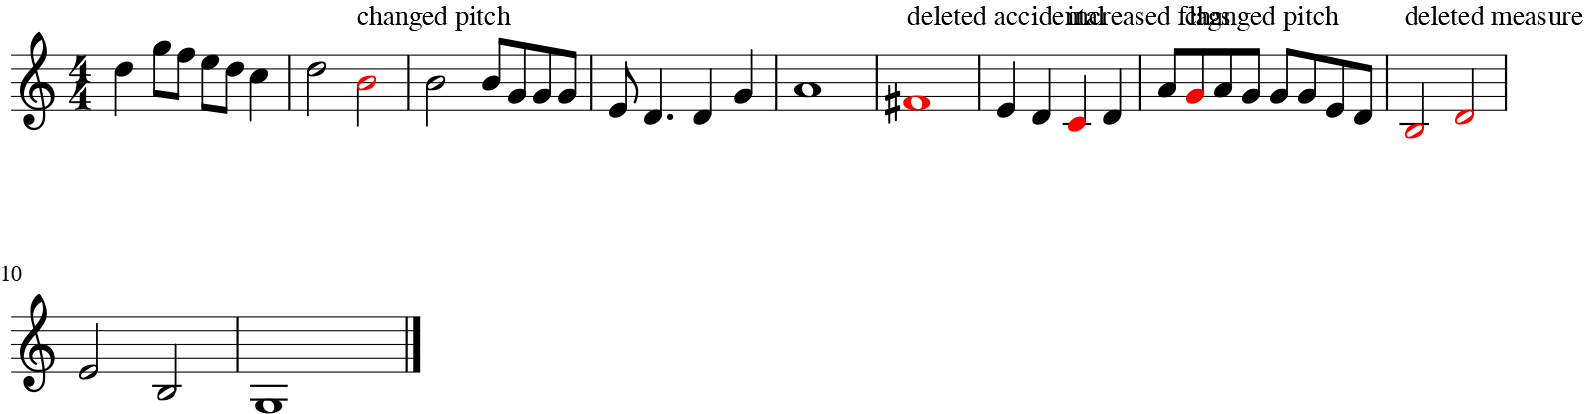

In [18]:
score1.show()

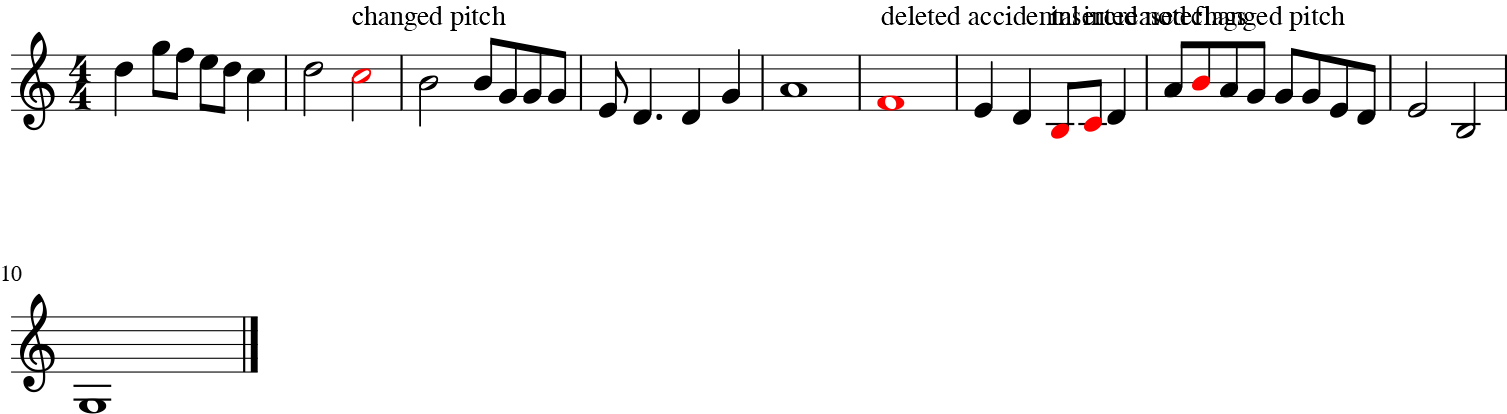

In [19]:
score2.show()

In [21]:
# an alternative
sv.show_differences(score1,score2)